In [5]:
import os
import random
import numpy as np
from matplotlib.pyplot import imshow

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [6]:
model = load_model("./model.h5")
model

2023-01-24 22:39:34.781446: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-24 22:39:34.781470: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-24 22:39:34.781486: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hope): /proc/driver/nvidia/version does not exist
2023-01-24 22:39:34.781684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


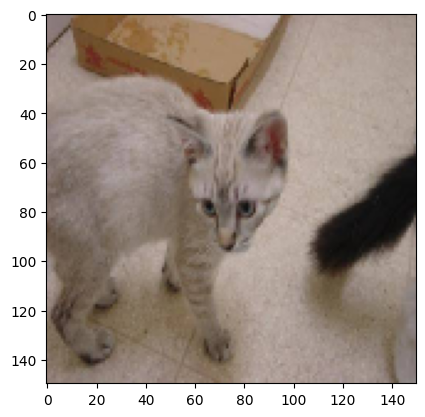

In [36]:
test_path = "/home/smbh/Projects/dogs_vs_cats_kaggle/data/raw/test1"
test_item = random.choice(os.listdir(test_path))
img = image.load_img(os.path.join(test_path, test_item), target_size=(150, 150))
imshow(img)

In [37]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
pred = model.predict(x)
print(pred)
print((pred > 0.5).astype("int32"))

1/1 [==============================] - 0s 19ms/step
[[0.01364468]]
[[0]]
